In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
classes_simple = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Semantic_Segmentation/color_coding_classes_clh.csv')
classes_simple = classes_simple[classes_simple['Use'] == 1]
classes_simple= classes_simple.iloc[:, [0, 8]]
classes_simple

,Idx,Name
0,1,wall
1,2,building;edifice
2,3,sky
3,4,floor;flooring
4,5,tree
6,7,road;route
8,9,windowpane;window
9,10,grass
11,12,sidewalk;pavement
12,13,person;individual;someone;somebody;mortal;soul


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Semantic_Segmentation/semantic_result.csv')
df = df.dropna(axis='columns', how='all')
df.fillna(0, inplace=True)
df

,Unnamed: 0,image_id,1,2,4,6,9,11,12,16,...,137,96,85,62,33,129,133,124,73,101
0,0,5205.0_panorama.jpg,0.022014,0.444005,0.041223,0.341505,0.133877,0.000597,0.000259,0.005775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5206.0_panorama.jpg,0.018830,0.444069,0.044503,0.278747,0.190036,0.006427,0.000037,0.003723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5207.0_panorama.jpg,0.021781,0.443564,0.043369,0.296600,0.177828,0.002853,0.000000,0.002256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,5208.0_panorama.jpg,0.025619,0.442730,0.041752,0.323264,0.152892,0.000539,0.000008,0.003986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5209.0_panorama.jpg,0.016856,0.440219,0.047219,0.355034,0.121405,0.000000,0.000283,0.003609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15245,95,12473.0_panorama.jpg,0.000141,0.274066,0.236536,0.026244,0.333022,0.000000,0.000000,0.002580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15246,96,12474.0_panorama.jpg,0.000000,0.311864,0.203027,0.037487,0.353225,0.000000,0.000077,0.002181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15247,97,12475.0_panorama.jpg,0.000009,0.299355,0.216672,0.035747,0.355856,0.000000,0.001139,0.002255,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15248,98,12476.0_panorama.jpg,0.000050,0.401772,0.104838,0.051544,0.362150,0.000000,0.002086,0.003205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_simple = df[['Unnamed: 0','image_id','1','2','3','4','5','7','9','10','12','13','18','21','26','44','54','103','final_safer.csv','final_livelier.csv','final_beautiful.csv','final_wealthier.csv','final_boring.csv','final_depressing.csv']]
df_simple

,Unnamed: 0,image_id,1,2,3,4,5,7,9,10,...,26,44,54,103,final_safer.csv,final_livelier.csv,final_beautiful.csv,final_wealthier.csv,final_boring.csv,final_depressing.csv
0,0,5205.0_panorama.jpg,0.022014,0.444005,0.0,0.041223,0.0,0.0,0.133877,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,1.0
1,1,5206.0_panorama.jpg,0.018830,0.444069,0.0,0.044503,0.0,0.0,0.190036,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
2,2,5207.0_panorama.jpg,0.021781,0.443564,0.0,0.043369,0.0,0.0,0.177828,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
3,3,5208.0_panorama.jpg,0.025619,0.442730,0.0,0.041752,0.0,0.0,0.152892,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
4,4,5209.0_panorama.jpg,0.016856,0.440219,0.0,0.047219,0.0,0.0,0.121405,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15245,95,12473.0_panorama.jpg,0.000141,0.274066,0.0,0.236536,0.0,0.0,0.333022,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,1.0,1.0
15246,96,12474.0_panorama.jpg,0.000000,0.311864,0.0,0.203027,0.0,0.0,0.353225,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0
15247,97,12475.0_panorama.jpg,0.000009,0.299355,0.0,0.216672,0.0,0.0,0.355856,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
15248,98,12476.0_panorama.jpg,0.000050,0.401772,0.0,0.104838,0.0,0.0,0.362150,0.0,...,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [ ]:
# Step 2: Prepare the data for regression
# Filter columns to include only those that contain integer data
independent_vars = [col for col in df.columns if df[col].dtype in ['float64']]
#independent_vars = [col for col in df.columns if df[col].dtype in ['int64', 'int32', 'float64'] and "Unnamed" not in col]
dependent_vars = [col for col in df.columns if col.startswith('final_safer')]  # Captures all columns starting with 'final_'

# Select the data for independent and dependent variables
X = df[independent_vars]
y = df[dependent_vars]

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (15250, 149)
y shape: (15250, 1)


In [ ]:
# 添加常数项以拟合截距
X = sm.add_constant(X)

# 拟合模型
model = sm.OLS(y, X).fit()

# 查看模型的统计摘要
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        final_safer.csv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.596e+26
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        01:49:57   Log-Likelihood:             4.1108e+05
No. Observations:               15250   AIC:                        -8.219e+05
Df Residuals:                   15101   BIC:                        -8.207e+05
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  6.65e-13 

In [ ]:
# Select all columns except the first two
df_simple_subset = df_simple.iloc[:, 2:]

# Calculate the correlation matrix
correlation_matrix = df_simple_subset.corr()

# Display the correlation matrix
correlation_matrix


,1,2,3,4,5,7,9,10,12,13,...,26,44,54,103,final_safer.csv,final_livelier.csv,final_beautiful.csv,final_wealthier.csv,final_boring.csv,final_depressing.csv
1,1.000000,-0.455406,-0.341143,-0.370623,-0.020196,-0.011834,-0.334156,0.000758,0.201016,-0.094181,...,-0.065520,0.008555,-0.009743,-0.004480,-0.014342,0.311277,-0.360368,0.058659,-0.267254,0.226708
2,-0.455406,1.000000,0.902317,-0.464893,-0.058661,-0.022974,-0.282332,-0.029968,-0.150201,-0.217113,...,-0.001063,-0.004780,0.004864,-0.009082,-0.148523,-0.178586,-0.311333,-0.193516,0.330079,0.304150
3,-0.341143,0.902317,1.000000,-0.291579,0.109295,0.038394,-0.373802,0.067165,-0.061778,-0.143209,...,-0.042002,-0.000713,-0.011206,-0.003128,-0.145893,-0.129905,-0.304253,-0.158166,0.251697,0.255657
4,-0.370623,-0.464893,-0.291579,1.000000,-0.020504,-0.008994,0.385833,-0.012326,-0.071592,0.377211,...,0.001964,-0.006747,-0.015753,-0.015444,0.122447,-0.110930,0.604976,0.122146,-0.107324,-0.526192
5,-0.020196,-0.058661,0.109295,-0.020504,1.000000,0.383536,-0.026416,0.342813,0.366534,-0.009567,...,-0.003137,0.029819,-0.000975,0.026623,-0.011570,-0.008769,-0.020311,-0.004432,0.019850,0.015134
7,-0.011834,-0.022974,0.038394,-0.008994,0.383536,1.000000,-0.011426,0.040239,0.240344,0.025790,...,-0.001861,-0.000016,-0.000624,0.003620,-0.006465,-0.007571,0.001658,-0.008456,0.010054,0.012701
9,-0.334156,-0.282332,-0.373802,0.385833,-0.026416,-0.011426,1.000000,-0.013075,-0.115184,-0.078650,...,0.101733,-0.007595,-0.000643,-0.021095,0.140665,-0.121568,0.480412,0.084114,0.009181,-0.360686
10,0.000758,-0.029968,0.067165,-0.012326,0.342813,0.040239,-0.013075,1.000000,0.000359,-0.005173,...,-0.002396,0.026019,-0.000415,-0.000601,-0.007361,-0.002969,-0.014019,-0.008655,0.008105,0.009774
12,0.201016,-0.150201,-0.061778,-0.071592,0.366534,0.240344,-0.115184,0.000359,1.000000,0.027688,...,-0.013084,0.047210,-0.006165,0.050260,0.003860,0.150870,-0.094148,0.023390,-0.125622,0.048211
13,-0.094181,-0.217113,-0.143209,0.377211,-0.009567,0.025790,-0.078650,-0.005173,0.027688,1.000000,...,-0.002339,0.002669,0.038153,0.014432,-0.038379,-0.072017,0.182362,-0.022318,-0.052353,-0.149427


In [ ]:
# Extract correlations with the 'final_safer.csv' column
correlations_with_final_safer = correlation_matrix['final_safer.csv'].sort_values(ascending=False)

# Display the correlations
correlations_with_final_safer

final_safer.csv         1.000000
final_wealthier.csv     0.494791
final_beautiful.csv     0.312945
final_livelier.csv      0.263194
9                       0.140665
4                       0.122447
26                      0.104028
21                      0.080363
18                      0.023765
12                      0.003860
44                     -0.003626
7                      -0.006465
10                     -0.007361
54                     -0.008254
103                    -0.008506
5                      -0.011570
1                      -0.014342
13                     -0.038379
3                      -0.145893
2                      -0.148523
final_boring.csv       -0.229226
final_depressing.csv   -0.382921
Name: final_safer.csv, dtype: float64

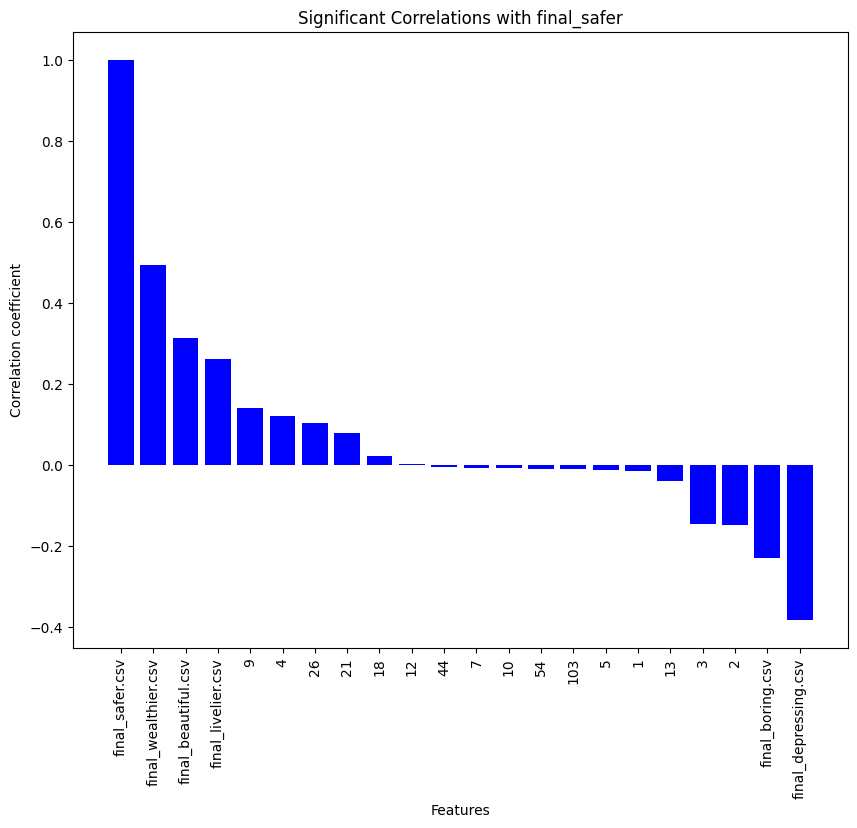

In [ ]:
# Assuming 'correlations_with_final_safer' is already calculated as shown previously
correlations_with_final_safer = correlation_matrix['final_safer.csv'].sort_values(ascending=False)

# Create a bar plot for the filtered correlations
plt.figure(figsize=(10, 8))  # Adjust the size as needed
plt.bar(correlations_with_final_safer.index, correlations_with_final_safer.values, color='blue')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.title('Significant Correlations with final_safer')
plt.xticks(rotation=90)  # Rotate the labels on the x-axis for better visibility
plt.show()

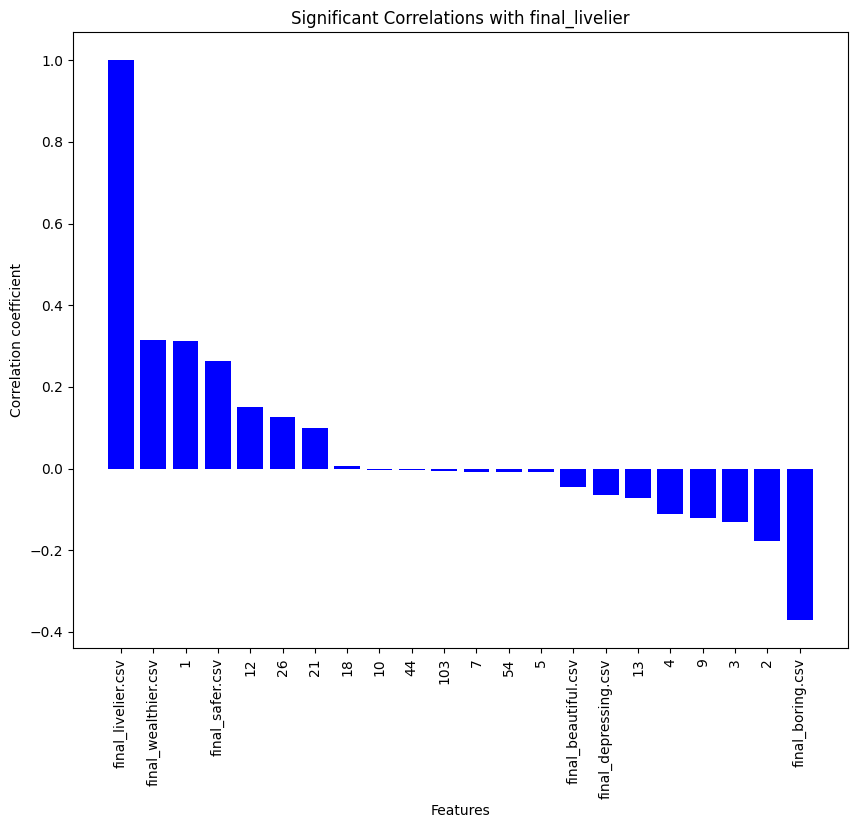

In [ ]:
correlations_with_final_livelier = correlation_matrix['final_livelier.csv'].sort_values(ascending=False)

# Create a bar plot for the filtered correlations
plt.figure(figsize=(10, 8))  # Adjust the size as needed
plt.bar(correlations_with_final_livelier.index, correlations_with_final_livelier.values, color='blue')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.title('Significant Correlations with final_livelier')
plt.xticks(rotation=90)  # Rotate the labels on the x-axis for better visibility
plt.show()

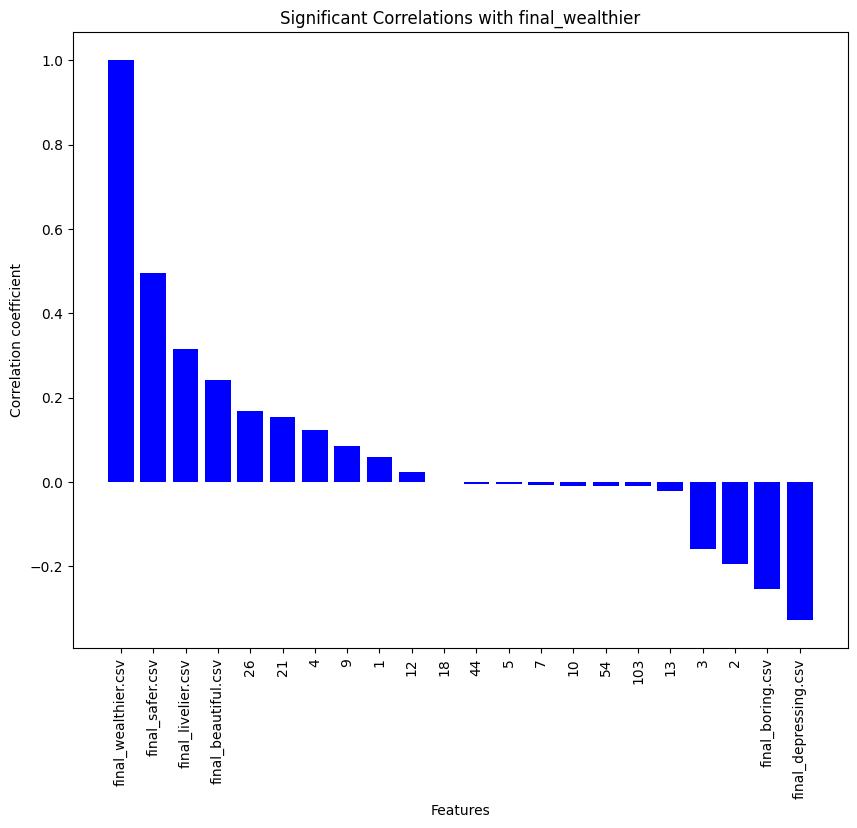

In [ ]:
correlations_with_final_wealthier = correlation_matrix['final_wealthier.csv'].sort_values(ascending=False)

# Create a bar plot for the filtered correlations
plt.figure(figsize=(10, 8))  # Adjust the size as needed
plt.bar(correlations_with_final_wealthier.index, correlations_with_final_wealthier, color='blue')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.title('Significant Correlations with final_wealthier')
plt.xticks(rotation=90)  # Rotate the labels on the x-axis for better visibility
plt.show()

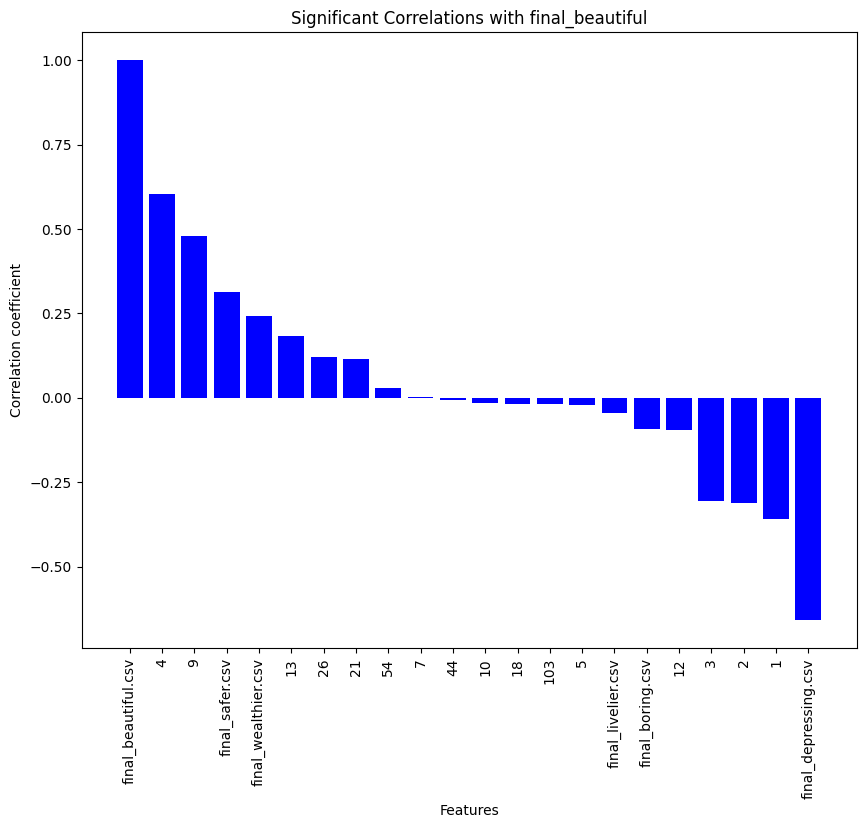

In [ ]:
correlations_with_final_beautiful = correlation_matrix['final_beautiful.csv'].sort_values(ascending=False)

# Create a bar plot for the filtered correlations
plt.figure(figsize=(10, 8))  # Adjust the size as needed
plt.bar(correlations_with_final_beautiful.index, correlations_with_final_beautiful.values, color='blue')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.title('Significant Correlations with final_beautiful')
plt.xticks(rotation=90)  # Rotate the labels on the x-axis for better visibility
plt.show()

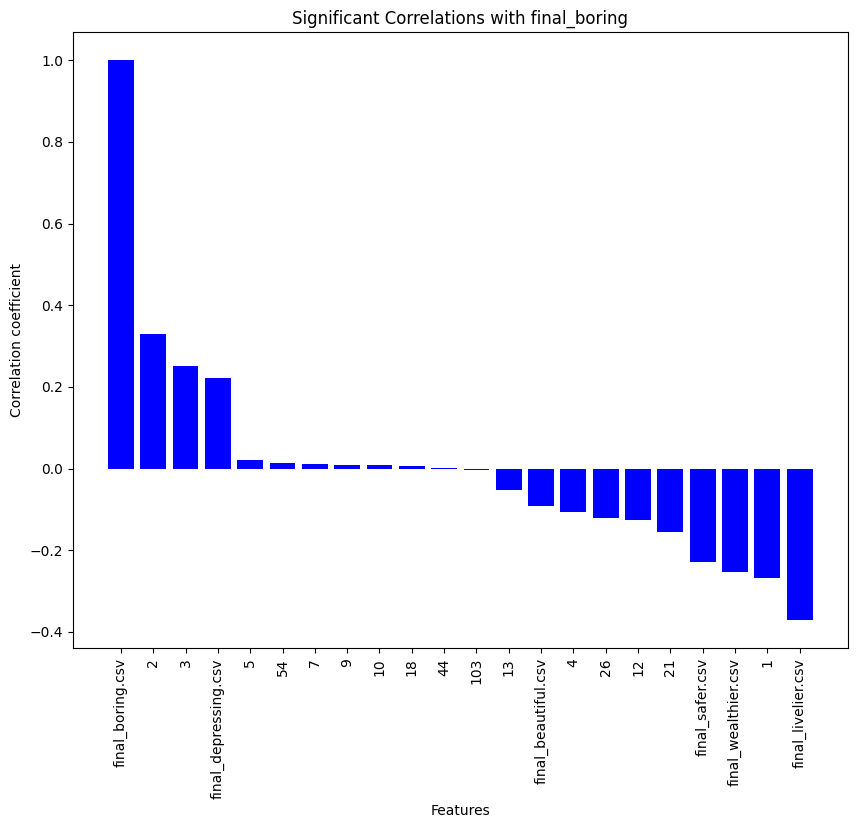

In [ ]:
correlations_with_final_boring = correlation_matrix['final_boring.csv'].sort_values(ascending=False)

# Create a bar plot for the filtered correlations
plt.figure(figsize=(10, 8))  # Adjust the size as needed
plt.bar(correlations_with_final_boring.index, correlations_with_final_boring.values, color='blue')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.title('Significant Correlations with final_boring')
plt.xticks(rotation=90)  # Rotate the labels on the x-axis for better visibility
plt.show()

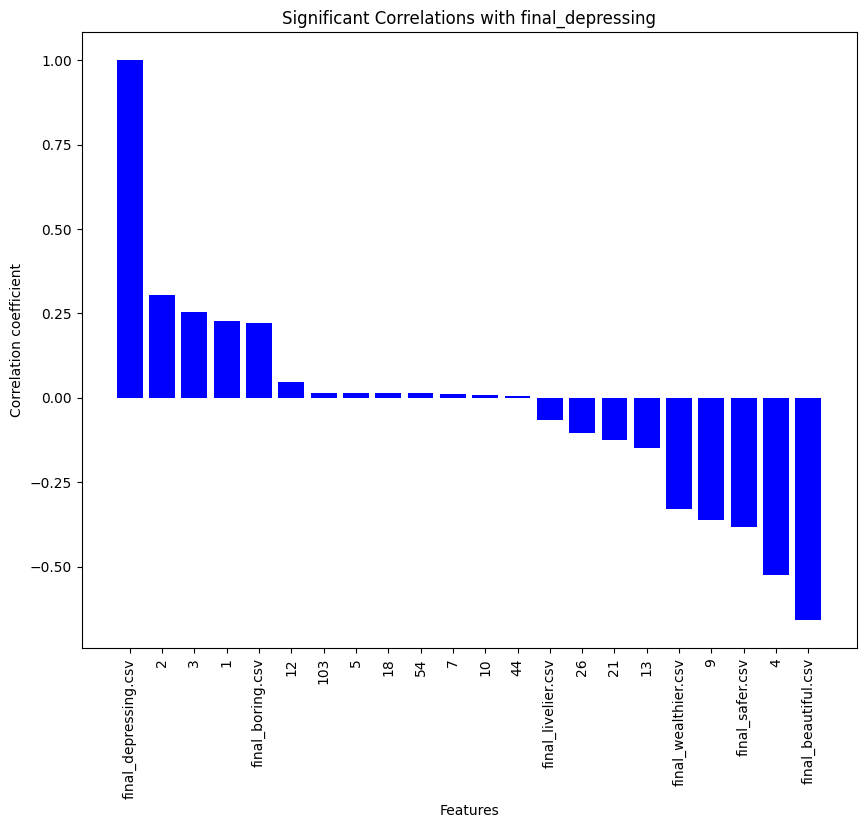

In [ ]:
correlations_with_final_depressing = correlation_matrix['final_depressing.csv'].sort_values(ascending=False)

# Create a bar plot for the filtered correlations
plt.figure(figsize=(10, 8))  # Adjust the size as needed
plt.bar(correlations_with_final_depressing.index, correlations_with_final_depressing.values, color='blue')
plt.xlabel('Features')
plt.ylabel('Correlation coefficient')
plt.title('Significant Correlations with final_depressing')
plt.xticks(rotation=90)  # Rotate the labels on the x-axis for better visibility
plt.show()

In [ ]:
correlations_with_final_depressing

final_depressing.csv    1.000000
2                       0.304150
3                       0.255657
1                       0.226708
final_boring.csv        0.220533
12                      0.048211
103                     0.015735
5                       0.015134
18                      0.014309
54                      0.013168
7                       0.012701
10                      0.009774
44                      0.006336
final_livelier.csv     -0.064956
26                     -0.103542
21                     -0.125743
13                     -0.149427
final_wealthier.csv    -0.327951
9                      -0.360686
final_safer.csv        -0.382921
4                      -0.526192
final_beautiful.csv    -0.658757
Name: final_depressing.csv, dtype: float64

In [ ]:
# Assuming you have loaded these Series from your previous calculations or files
# Example names: corr_depressing, corr_boring, corr_wealthier, corr_safer, corr_livelier, corr_beautiful

# Combine into a DataFrame
combined_df = pd.concat([correlations_with_final_safer, correlations_with_final_livelier, correlations_with_final_beautiful,correlations_with_final_wealthier, correlations_with_final_boring,correlations_with_final_depressing ], axis=1)

# Optionally, give them appropriate column names
combined_df.columns = ['Safer', 'Livelier', 'Beautiful','Wealthier','Boring','Depressing' ]
combined_df.fillna(0, inplace=True)

In [ ]:
combined_df

,Safer,Livelier,Beautiful,Wealthier,Boring,Depressing
final_safer.csv,1.000000,0.263194,0.312945,0.494791,-0.229226,-0.382921
final_wealthier.csv,0.494791,0.314761,0.242334,1.000000,-0.253334,-0.327951
final_beautiful.csv,0.312945,-0.044717,1.000000,0.242334,-0.092948,-0.658757
final_livelier.csv,0.263194,1.000000,-0.044717,0.314761,-0.371547,-0.064956
9,0.140665,-0.121568,0.480412,0.084114,0.009181,-0.360686
4,0.122447,-0.110930,0.604976,0.122146,-0.107324,-0.526192
26,0.104028,0.126677,0.122044,0.168151,-0.120408,-0.103542
21,0.080363,0.099740,0.115510,0.154800,-0.155034,-0.125743
18,0.023765,0.005052,-0.018637,-0.000910,0.005481,0.014309
12,0.003860,0.150870,-0.094148,0.023390,-0.125622,0.048211


In [ ]:
is_digit = lambda x: x.isdigit() if isinstance(x, str) else True

# 使用条件表达式选择行
digit_rows = combined_df[combined_df.index.map(is_digit)]
digit_rows

,Safer,Livelier,Beautiful,Wealthier,Boring,Depressing
9,0.140665,-0.121568,0.480412,0.084114,0.009181,-0.360686
4,0.122447,-0.110930,0.604976,0.122146,-0.107324,-0.526192
26,0.104028,0.126677,0.122044,0.168151,-0.120408,-0.103542
21,0.080363,0.099740,0.115510,0.154800,-0.155034,-0.125743
18,0.023765,0.005052,-0.018637,-0.000910,0.005481,0.014309
12,0.003860,0.150870,-0.094148,0.023390,-0.125622,0.048211
44,-0.003626,-0.003344,-0.007472,-0.004000,0.001738,0.006336
7,-0.006465,-0.007571,0.001658,-0.008456,0.010054,0.012701
10,-0.007361,-0.002969,-0.014019,-0.008655,0.008105,0.009774
54,-0.008254,-0.007613,0.028014,-0.009105,0.014593,0.013168


In [ ]:
# 假设 classes 是包含 'Idx' 和 'Name' 列的 DataFrame
name_map = classes_simple.set_index('Idx')['Name'].to_dict()
# 转换索引为整数类型
digit_rows.index = digit_rows.index.astype(int)
# 应用映射添加 'Name' 列
digit_rows['Name'] = digit_rows.index.map(name_map)
digit_rows

<ipython-input-19-b27da02b25fb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digit_rows['Name'] = digit_rows.index.map(name_map)


,Safer,Livelier,Beautiful,Wealthier,Boring,Depressing,Name
9,0.140665,-0.121568,0.480412,0.084114,0.009181,-0.360686,windowpane;window
4,0.122447,-0.110930,0.604976,0.122146,-0.107324,-0.526192,floor;flooring
26,0.104028,0.126677,0.122044,0.168151,-0.120408,-0.103542,house
21,0.080363,0.099740,0.115510,0.154800,-0.155034,-0.125743,car;auto;automobile;machine;motorcar
18,0.023765,0.005052,-0.018637,-0.000910,0.005481,0.014309,plant;flora;plant;life
12,0.003860,0.150870,-0.094148,0.023390,-0.125622,0.048211,sidewalk;pavement
44,-0.003626,-0.003344,-0.007472,-0.004000,0.001738,0.006336,signboard;sign
7,-0.006465,-0.007571,0.001658,-0.008456,0.010054,0.012701,road;route
10,-0.007361,-0.002969,-0.014019,-0.008655,0.008105,0.009774,grass
54,-0.008254,-0.007613,0.028014,-0.009105,0.014593,0.013168,stairs;steps


In [ ]:
digit_rows['Name'] = digit_rows['Name'].replace({'windowpane;window': 'window', 'floor;flooring': 'floor','car;auto;automobile;machine;motorcar':'car','plant;flora;plant;life':'plant','sidewalk;pavement':'sidewalk','signboard;sign':'sign','road;route':'road','stairs;steps':'stairs','person;individual;someone;somebody;mortal;soul':'person','building;edifice':'building'})
digit_rows

<ipython-input-20-b82f22c3120b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  digit_rows['Name'] = digit_rows['Name'].replace({'windowpane;window': 'window', 'floor;flooring': 'floor','car;auto;automobile;machine;motorcar':'car','plant;flora;plant;life':'plant','sidewalk;pavement':'sidewalk','signboard;sign':'sign','road;route':'road','stairs;steps':'stairs','person;individual;someone;somebody;mortal;soul':'person','building;edifice':'building'})


,Safer,Livelier,Beautiful,Wealthier,Boring,Depressing,Name
9,0.140665,-0.121568,0.480412,0.084114,0.009181,-0.360686,window
4,0.122447,-0.110930,0.604976,0.122146,-0.107324,-0.526192,floor
26,0.104028,0.126677,0.122044,0.168151,-0.120408,-0.103542,house
21,0.080363,0.099740,0.115510,0.154800,-0.155034,-0.125743,car
18,0.023765,0.005052,-0.018637,-0.000910,0.005481,0.014309,plant
12,0.003860,0.150870,-0.094148,0.023390,-0.125622,0.048211,sidewalk
44,-0.003626,-0.003344,-0.007472,-0.004000,0.001738,0.006336,sign
7,-0.006465,-0.007571,0.001658,-0.008456,0.010054,0.012701,road
10,-0.007361,-0.002969,-0.014019,-0.008655,0.008105,0.009774,grass
54,-0.008254,-0.007613,0.028014,-0.009105,0.014593,0.013168,stairs


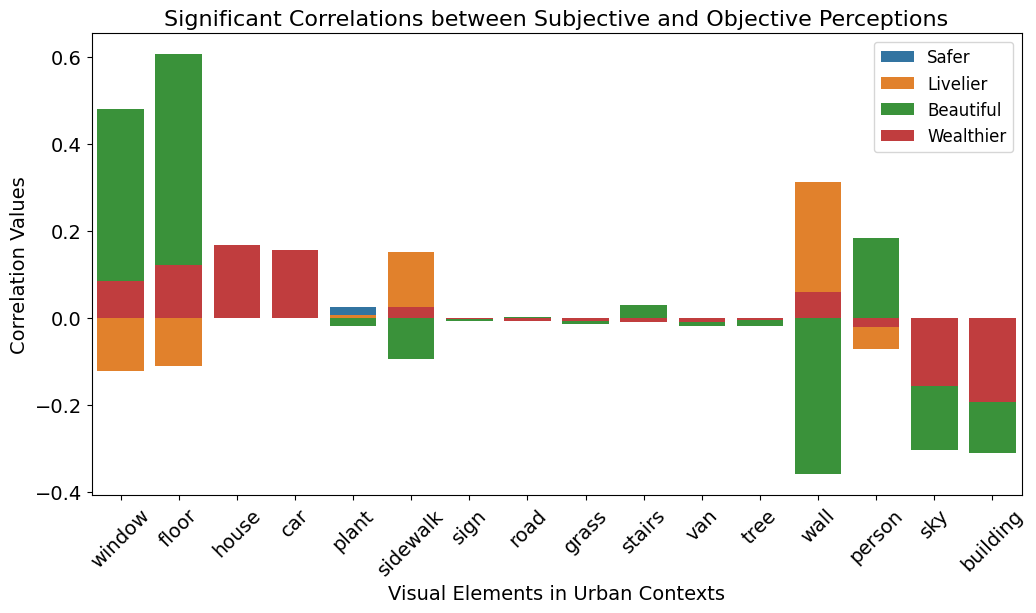

In [ ]:
plt.figure(figsize=(12, 6))  # 设置图形的大小

# 对每个类别进行可视化
for category in ['Safer', 'Livelier', 'Beautiful', 'Wealthier']:
    # 为每个类别创建一个条形图
    sns.barplot(x='Name', y=category, data=digit_rows, label=category)

# 设置坐标轴标签和标题的字体大小
plt.xticks(rotation=45, fontsize=14)  # 调整x轴刻度标签的字体大小
plt.yticks(fontsize=14)  # 调整y轴刻度标签的字体大小
plt.xlabel('Visual Elements in Urban Contexts', fontsize=14)
plt.ylabel('Correlation Values', fontsize=14)
plt.title('Significant Correlations between Subjective and Objective Perceptions', fontsize=16)
plt.legend(fontsize=12)

# 显示图表
plt.show()


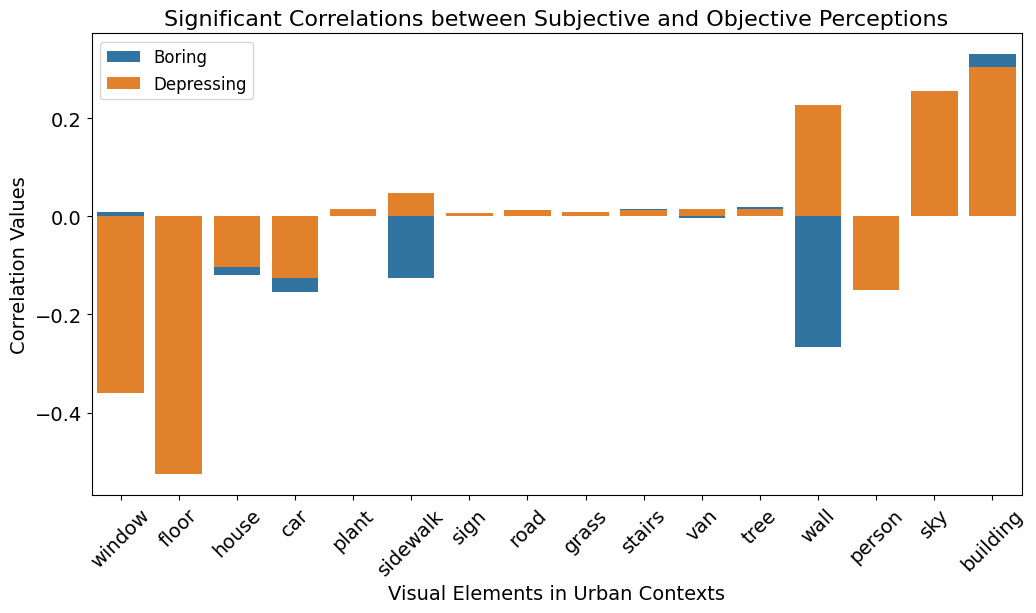

In [ ]:
plt.figure(figsize=(12, 6))  # 设置图形的大小

# 对每个类别进行可视化
for category in ['Boring', 'Depressing']:
    # 为每个类别创建一个条形图
    sns.barplot(x='Name', y=category, data=digit_rows, label=category)

# 设置坐标轴标签和标题的字体大小
plt.xticks(rotation=45, fontsize=14)  # 调整x轴刻度标签的字体大小
plt.yticks(fontsize=14)  # 调整y轴刻度标签的字体大小
plt.xlabel('Visual Elements in Urban Contexts', fontsize=14)
plt.ylabel('Correlation Values', fontsize=14)
plt.title('Significant Correlations between Subjective and Objective Perceptions', fontsize=16)  # 图表标题
plt.legend(fontsize=12)  # 显示图例

plt.show()

In [ ]:
import scipy.stats

# 创建两个空的DataFrame来保存结果，一个用于相关系数，另一个用于p-values
p_values = pd.DataFrame(index=df_simple_subset.columns, columns=df_simple_subset.columns, dtype=float)

# 计算每对变量之间的相关性和p-value
for col1 in df_simple_subset.columns:
    for col2 in df_simple_subset.columns:
        if col1 != col2:  # 避免计算同一变量与自身的相关性
            corr, p_val = scipy.stats.pearsonr(df_simple_subset[col1].dropna(), df_simple_subset[col2].dropna())
            p_values.loc[col1, col2] = p_val
        else:  # 相同变量的相关性总是1，p-value为0
            p_values.loc[col1, col2] = 0

p_values